Questions

1)What is relationship between gender on survival?

2)What is relationship between class on survival?

3)What is relationship between class, gender on survival?

4) What is relationship between port of embarkation on survival?

5)What is relationship between port of embarkation, gender, class on survival?

6) What is relationship between different age group on survival?


In [2]:

%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [19]:
titanic_df = pd.read_csv('titanic_data.csv')
#print titanic_df

In [4]:
#Find possible values of survival, class, age and Embark 

#clean the data based on values present in the data frame

#If the value for age and Embarked is not present I cleaned the data frame by dropping the particular row

print "Unique values of survived:",titanic_df.Survived.unique()

print "Unique values of class of travel:",titanic_df.Pclass.unique()

print "Unique gender of people:", titanic_df.Sex.unique()

print "Unique class of travel:", titanic_df.Embarked.unique()

print "Unique age of people:", titanic_df.Age.unique()

print "Unique values for sibling and Spouse", titanic_df.SibSp.unique()

#print "Total Number of People Travelled:", titanic_df.count()

titanic_df_without_na_age = titanic_df.dropna(subset=['Age'], how='all')
titanic_df_without_na_age_embark =  titanic_df_without_na_age.dropna(subset=['Embarked'], how='all')


titanic_df_cleaned = titanic_df_without_na_age_embark    #cleaned data frame

print "Unique age of people after cleaning:", titanic_df_cleaned.Age.unique()
print "Unique class of travel after cleaning:", titanic_df_cleaned.Embarked.unique()
#print "Total Number of People After Cleaning",titanic_df_cleaned.count()


Unique values of survived: [0 1]
Unique values of class of travel: [3 1 2]
Unique gender of people: ['male' 'female']
Unique class of travel: ['S' 'C' 'Q' nan]
Unique age of people: [ 22.    38.    26.    35.      nan  54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.
  59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.
  55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.
  41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.
   0.75  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42
  34.5   74.  ]
Unique values for sibling and Spouse [1 0 3 4 2 5 8]
Unique age of people after cleaning: [ 22.    38.    26.    35.    54.     2.    27.    14.     4.    58.    20.
  39.    55.    31.    34.    15.

In [5]:


#Function to create percentage of survived and deceased which are grouped by column(s) 

def group_by_survived_percent(data,col):
    
    sum_survived_by_col = data.groupby(col).sum()['Survived']
    count_survived_by_col = data.groupby(col).size()
    percent_survived = ((sum_survived_by_col) / count_survived_by_col)*100 
    percent_survived_df = pd.DataFrame(percent_survived).reset_index()
    #sum_survived_by_col_df = pd.DataFrame(sum_survived_by_col).reset_index()
    #sum_survived_by_col_df = sum_survived_by_col_df.rename(columns={0: 'CountAlive'})
    #count_survived_by_col_df = count_survived_by_col_df
    #sum_survived_by_col_df
    percent_survived_df = percent_survived_df.rename(columns={0: 'percentAlive'})
    percent_survived_df['percentDeceased'] = (100 - percent_survived_df['percentAlive']) 
    
    return percent_survived_df
    

In [6]:

#Function to create count of survived and deceased which are grouped by column(s) 
def group_by_survived_count(data,col):
    sum_survived_by_col = data.groupby(col).sum()['Survived']
    count_survived_by_col_df = data.groupby(col).size().reset_index()
    #print count_survived_by_col_df
    #sum_survived_by_col = count_survived_by_col - sum_survived_by_col
    sum_survived_by_col_df = pd.DataFrame(sum_survived_by_col).reset_index()
    sum_survived_by_col_df['deceased'] = count_survived_by_col_df[0] - sum_survived_by_col_df['Survived']
    #sum_survived_by_col_df = sum_survived_by_col_df.rename(columns={0: 'CountAlive'})
    return sum_survived_by_col_df

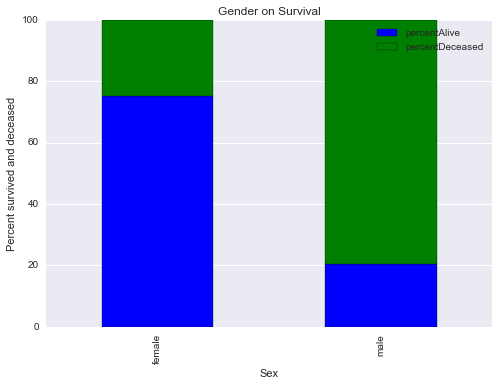

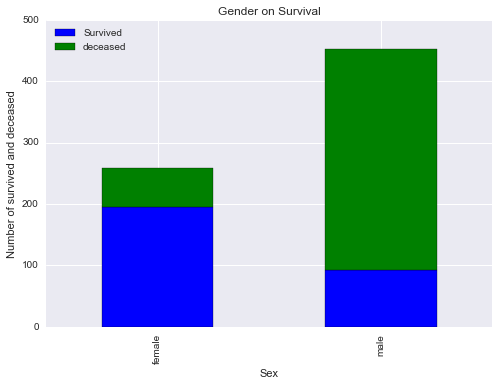

      Sex  Survived  deceased
0  female       195        64
1    male        93       360
      Sex  percentAlive  percentDeceased
0  female     75.289575        24.710425
1    male     20.529801        79.470199


In [12]:
#Determines relationship between gender and survival


percent_survived_by_sex_df = group_by_survived_percent(titanic_df_cleaned,'Sex')
count_survived_by_sex_df = group_by_survived_count(titanic_df_cleaned,'Sex')

percent_survived_by_sex_df.plot.bar(stacked=True,x='Sex')
plt.ylabel("Percent survived and deceased")
plt.title("Gender on Survival")
plt.show()
count_survived_by_sex_df.plot.bar(stacked=True,x='Sex')
plt.ylabel("Number of survived and deceased")
plt.title("Gender on Survival")
plt.show()
print count_survived_by_sex_df
print percent_survived_by_sex_df




1)What is relationship between gender on survival?

We can see that there is a relationship between genders on survival. From total of 259 female 195 have survived, whereas only 93 
Out of 453 men survived. Survival percent of female is 75.29% compared to 20.53% for male. These data shows female had better 
Chance of survival than male. This relationship can be clearly seen in the bar chart.

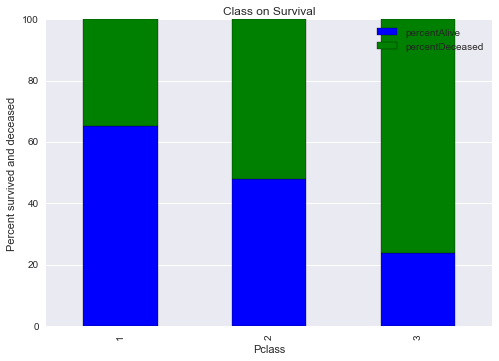

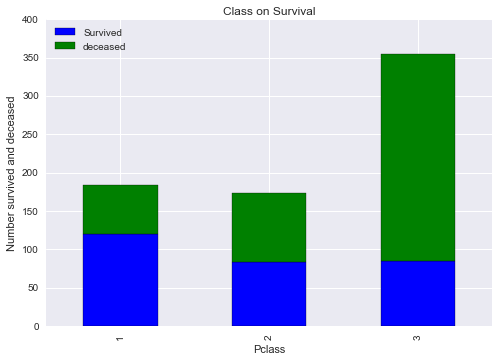

   Pclass  Survived  deceased
0       1       120        64
1       2        83        90
2       3        85       270
   Pclass  percentAlive  percentDeceased
0       1     65.217391        34.782609
1       2     47.976879        52.023121
2       3     23.943662        76.056338


In [13]:
#Determines relationship between class on survival


percent_survived_by_class_df = group_by_survived_percent(titanic_df_cleaned,'Pclass')
count_survived_by_class_df   = group_by_survived_count(titanic_df_cleaned,'Pclass')
percent_survived_by_class_df.plot.bar(stacked=True, x='Pclass')
plt.ylabel("Percent survived and deceased")
plt.title("Class on Survival")
plt.show()
count_survived_by_class_df.plot.bar(stacked=True,x='Pclass')
plt.ylabel("Number survived and deceased")
plt.title("Class on Survival")
plt.show()
print count_survived_by_class_df
print percent_survived_by_class_df 


2)What is relationship between class on survival? 

We can see there is some relationship between classes (socio-economic status) on survival. Higher the class better is survival 
chance. From total of 184 first class people only 120 survived, on the other hand only 83 of 173 second class people survived
and 85 of 355 people from third class survived. This corresponds to survival percentage of 65.22%, 47.98% and 23.94% for first, 
second and third class respectively. These data show better the class better the survival chance. This relationship can be 
clearly visualized using stacked bar chart.

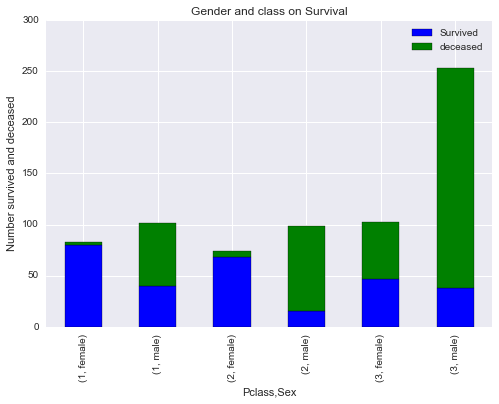

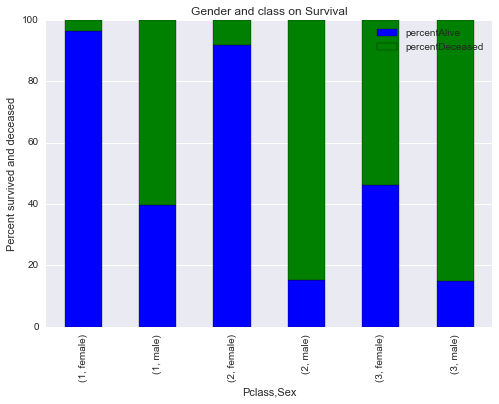

   Pclass     Sex  percentAlive  percentDeceased
0       1  female     96.385542         3.614458
1       1    male     39.603960        60.396040
2       2  female     91.891892         8.108108
3       2    male     15.151515        84.848485
4       3  female     46.078431        53.921569
5       3    male     15.019763        84.980237
   Pclass     Sex  Survived  deceased
0       1  female        80         3
1       1    male        40        61
2       2  female        68         6
3       2    male        15        84
4       3  female        47        55
5       3    male        38       215


In [14]:
#Determines relationship between class on survival


percent_group_by_sex_class = group_by_survived_percent(titanic_df_cleaned,['Pclass','Sex'])
count_group_by_sex_class  = group_by_survived_count(titanic_df_cleaned,['Pclass','Sex'])

count_group_by_sex_class.plot.bar(stacked=True,x=['Pclass','Sex'],y=['Survived','deceased'])
plt.ylabel("Number survived and deceased")
plt.title("Gender and class on Survival")

plt.show()
percent_group_by_sex_class.plot.bar(stacked=True,x=['Pclass','Sex'],y=['percentAlive','percentDeceased'])
plt.ylabel("Percent survived and deceased")
plt.title("Gender and class on Survival")
plt.show()

print percent_group_by_sex_class
print count_group_by_sex_class
#group_by_sex_class = group_by_sex.groupby('Pclass').sum()['Survived']



3)What is relationship between class, gender on survival?

we can see there relationship between class, gender on survival. Irrespective of the class female had better chance of survival. For instance survival percentage of female in first class is 96.39% compared to 39.60% of male in first class. Similarly survival percentage of female in third class is 46.08% compared to 15.0197% for male. 

Irrespective of gender people belong to higher class had better chance of survival, for instance survival percentage of first 
class male is 39.60% compared to 15.15% and 15.02% in second and third class respectively. Similarly we can see there is 
a drastic reduction in survival percentage of female as we move from first class to third class. These relationship 
can be clearly established using the stacked bar chart.


In [15]:
#Determines relationship between Embarking on survival
percent_group_by_embark_df = group_by_survived_percent(titanic_df_cleaned,'Embarked')
count_group_by_embark_df   = group_by_survived_count(titanic_df_cleaned,'Embarked')
#percent_group_by_embark_df.plot.bar(stacked=True, x='Embarked')
#count_group_by_embark_df.plot.bar(stacked=True,x='Embarked')
#plt.show()
print count_group_by_embark_df
print percent_group_by_embark_df

  Embarked  Survived  deceased
0        C        79        51
1        Q         8        20
2        S       201       353
  Embarked  percentAlive  percentDeceased
0        C     60.769231        39.230769
1        Q     28.571429        71.428571
2        S     36.281588        63.718412


4) what is relationship between port of embarkation on survival?

Even though we see some pattern between port of embarkation and survival, it is very difficult to establish relationship 
between the two. Since number of people embarked at Southampton is much more compared to Cherbourg and Queenstown.  


In [16]:
#Determine relationship between 

percent_group_by_embark_class = group_by_survived_percent(titanic_df_cleaned,['Embarked','Pclass','Sex'])

count_group_by_embark_class  = group_by_survived_count(titanic_df_cleaned,['Embarked','Pclass','Sex'])

#group_by_sex.plot(kind='bar')

print count_group_by_embark_class
print percent_group_by_embark_class

   Embarked  Pclass     Sex  Survived  deceased
0         C       1  female        37         1
1         C       1    male        16        20
2         C       2  female         7         0
3         C       2    male         1         7
4         C       3  female        11         5
5         C       3    male         7        18
6         Q       1  female         1         0
7         Q       1    male         0         1
8         Q       2  female         1         0
9         Q       2    male         0         1
10        Q       3  female         5         5
11        Q       3    male         1        13
12        S       1  female        42         2
13        S       1    male        24        40
14        S       2  female        60         6
15        S       2    male        14        76
16        S       3  female        31        45
17        S       3    male        30       184
   Embarked  Pclass     Sex  percentAlive  percentDeceased
0         C       1  female  

5)What is relationship between port of embarkation, gender, class on survival?

Since most people embarked at Southampton, we can fix port of embarkation to Southampton and compare gender and class on 
survival. For Southampton irrespective of class female had better chance of survival compared to male. For instance 95.45% 
of female survived compared to 37.5% of male in first class. Similarly irrespective of the gender people from higher class 
had better chance of survival.For instance 37.5% male survived in first class compared to 15.56% of male in second class.


          PassengerId  Survived  Pclass      Age  SibSp  Parch       Fare  \
Age                                                                         
(0, 10]         27574        38     169   273.17    118     91  1947.8041   
(10, 20]        51481        44     291  1991.50     68     45  3395.8961   
(20, 30]        98597        84     549  5847.50     74     55  6510.5453   
(30, 40]        72585        68     323  5395.00     58     61  6506.8955   
(40, 50]        41581        33     165  3902.00     32     37  3540.0336   
(50, 60]        18892        17      64  2305.50     13     13  1880.5417   
(60, 70]         6495         3      25  1024.00      3      6   700.4833   

          count    percent  
Age                         
(0, 10]      64  59.375000  
(10, 20]    115  38.260870  
(20, 30]    230  36.521739  
(30, 40]    154  44.155844  
(40, 50]     86  38.372093  
(50, 60]     42  40.476190  
(60, 70]     16  18.750000  


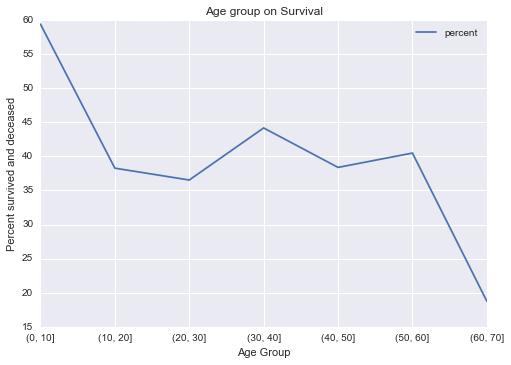

In [17]:
#Relation ship between age group on survival

#Age is divided into group of 10

survival_by_age_group = titanic_df_cleaned.groupby(pd.cut(titanic_df_cleaned['Age'],np.arange(0,80,10))).sum()
survival_by_age_group_count = titanic_df_cleaned.groupby(pd.cut(titanic_df_cleaned['Age'],np.arange(0,80,10))).count()
survival_by_age_group['count'] = survival_by_age_group_count['Survived']
survival_by_age_group['percent'] = (survival_by_age_group['Survived']/survival_by_age_group['count']) * 100
#survival_by_age_group.plot(x='Age',y='percent')
#plt.show()
#print survival_by_age_group_count

survival_by_age_group.plot(y='percent')
plt.xlabel("Age Group")
plt.ylabel("Percent survived and deceased")
plt.title("Age group on Survival")
#plt.show()
print survival_by_age_group

6)What is relationship between different age group on survival?

From the plot we can see children below age group of 10 had better chance of survival than others. 

Even though from the graph we can see people above 60 had lower chance of survival compared to others, it is very difficult
to characterize since only 16 of them are aged 60 and above.


Conclusion:

From the analysis we can see there is some relationship between gender, class and age group on survival. Female had 
better chance of survaial and people from higher class had better chance of survival. Similarly children below the age of 10 
had better chance of survival compared to others. It is very difficult to establish relationship between the port of embarkation 
and survival. Since number of people embarked at Southampton is much more compared to Cherbourg and Queenstown.

In the dataset there are some missing values for some age and Embarkation. I handled this by dropping the whole row, instead of handling it in a better way. For instance I could have kept these values for single variable gender analysis. Moreover I did not handle missing data for Cabin, so there some inconsistency in handling of missing data. I did not conduct any statistical testing such as hypothesis testing, so my analysis did not establish any scientific correlation.  

In [ ]:
Reference:
[1]http://stackoverflow.com/questions/21441259/pandas-groupby-range-of-values
[2]http://pandas.pydata.org/pandas-docs/stable/visualization.html